In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Generate synthetic data (2 features for visualization)

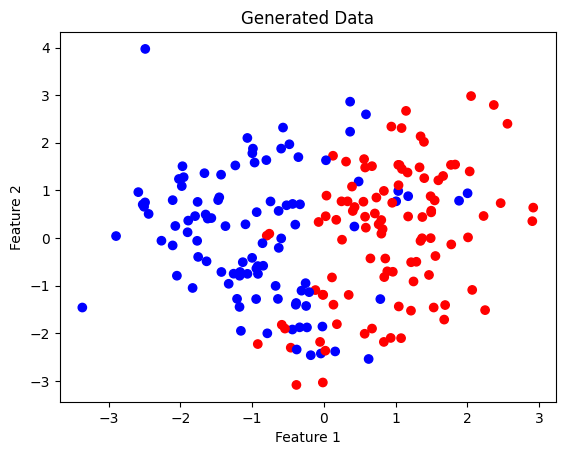

In [5]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data")
plt.show()

### Define distance function (Euclidean distance)

In [6]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

### Implement KNN Classifier from scratch

In [7]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            values, counts = np.unique(k_nearest_labels, return_counts=True)
            predictions.append(values[np.argmax(counts)])
        return np.array(predictions)

### Train & Test our KNN

In [8]:
knn = KNN(k=5)
knn.fit(X, y)

y_pred = knn.predict(X)

accuracy = np.mean(y_pred == y) * 100
print("Training Accuracy:", accuracy, "%")

Training Accuracy: 91.0 %


### Visualize decision boundary

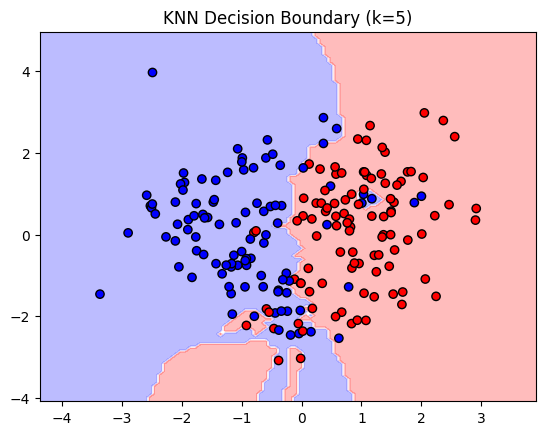

In [9]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_grid = knn.predict(X_grid).reshape(xx1.shape)

plt.contourf(xx1, xx2, y_grid, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("KNN Decision Boundary (k=5)")
plt.show()

### Compare with Scikit-Learn

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

print("Sklearn Accuracy:", clf.score(X, y) * 100, "%")

Sklearn Accuracy: 91.0 %
